In [26]:
# Synthetic Competing Risks Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.plotting import plot_lifetimes
from lifelines.utils import concordance_index
from matplotlib.gridspec import GridSpec
%matplotlib inline

# Set style for plots
plt.style.use('seaborn-whitegrid')
sns.set_palette("colorblind")

In [ ]:
in_filename = './sample data/SYNTHETIC/synthetic_comprisk.csv'
df = pd.read_csv(in_filename, sep=',')# Load the dataset
df = pd.read_csv('./sample data/SYNTHETIC/synthetic_comprisk.csv', sep=',')

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Basic dataset information
print("\nDataset shape:", df.shape)
print("\nData types:")
display(df.dtypes)

# Basic statistics
print("\nBasic statistics:")
display(df.describe())

# Basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"Event distribution:\n{df['label'].value_counts()}")

FileNotFoundError: [Errno 2] No such file or directory: 'synthetic_comprisk.csv'

Event Distribution:


,Count,Percentage (%)
Censored,15000,50.000000
Event 1,7600,25.333333
Event 2,7400,24.666667


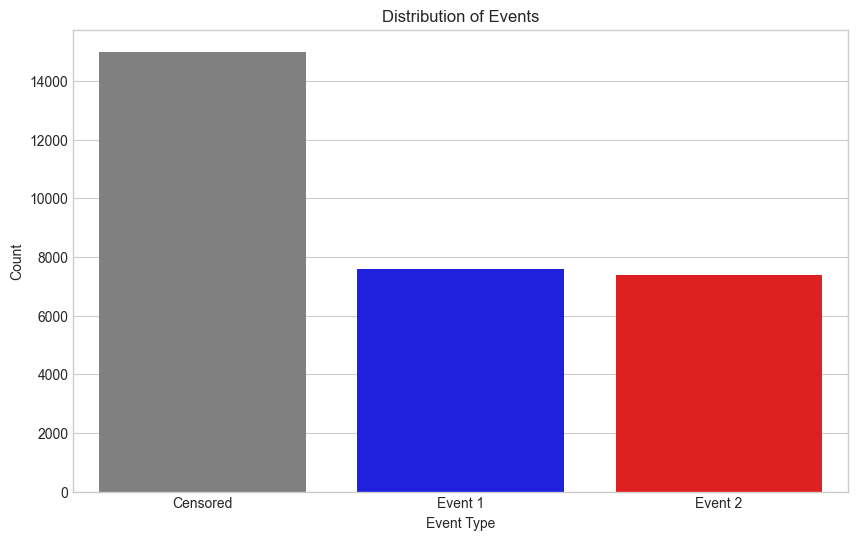

In [9]:
# Calculate event counts and percentages
event_counts = df['label'].value_counts().sort_index()
event_percentages = 100 * event_counts / len(df)

# Create a summary DataFrame
event_summary = pd.DataFrame({
    'Count': event_counts,
    'Percentage (%)': event_percentages
})
event_summary.index = ['Censored', 'Event 1', 'Event 2']

print("Event Distribution:")
display(event_summary)

# Visualize event distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, palette=['gray', 'blue', 'red'])
plt.xticks([0, 1, 2], ['Censored', 'Event 1', 'Event 2'])
plt.title('Distribution of Events')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

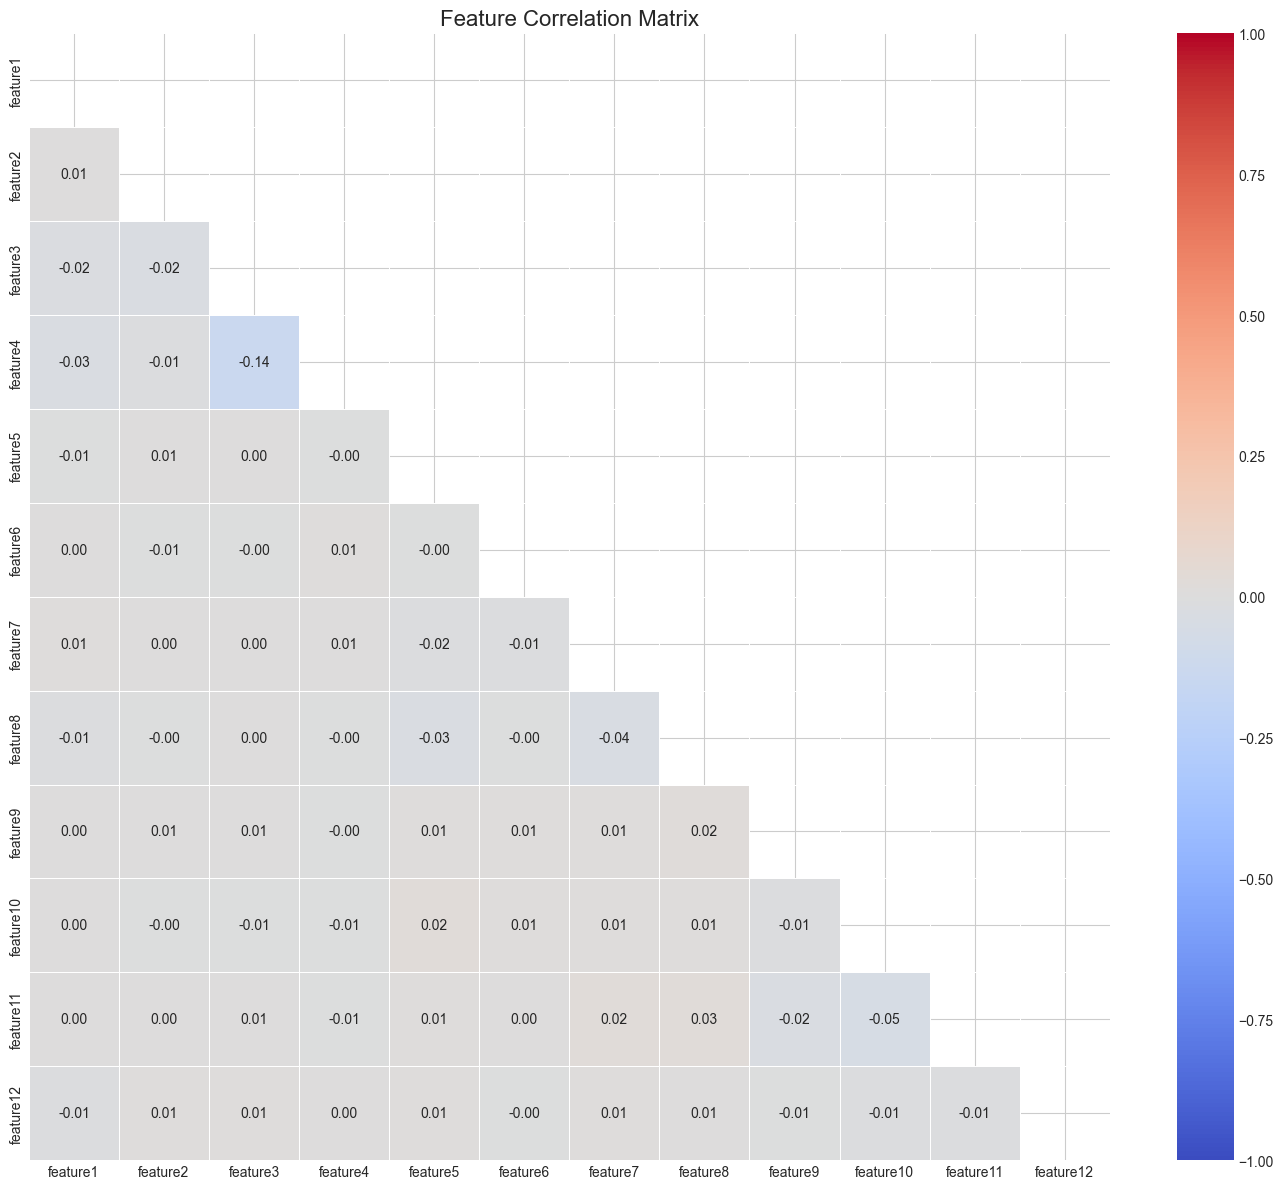

In [10]:
# Select feature columns
feature_cols = [col for col in df.columns if 'feature' in col]

# Correlation heatmap
plt.figure(figsize=(14, 12))
corr_matrix = df[feature_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

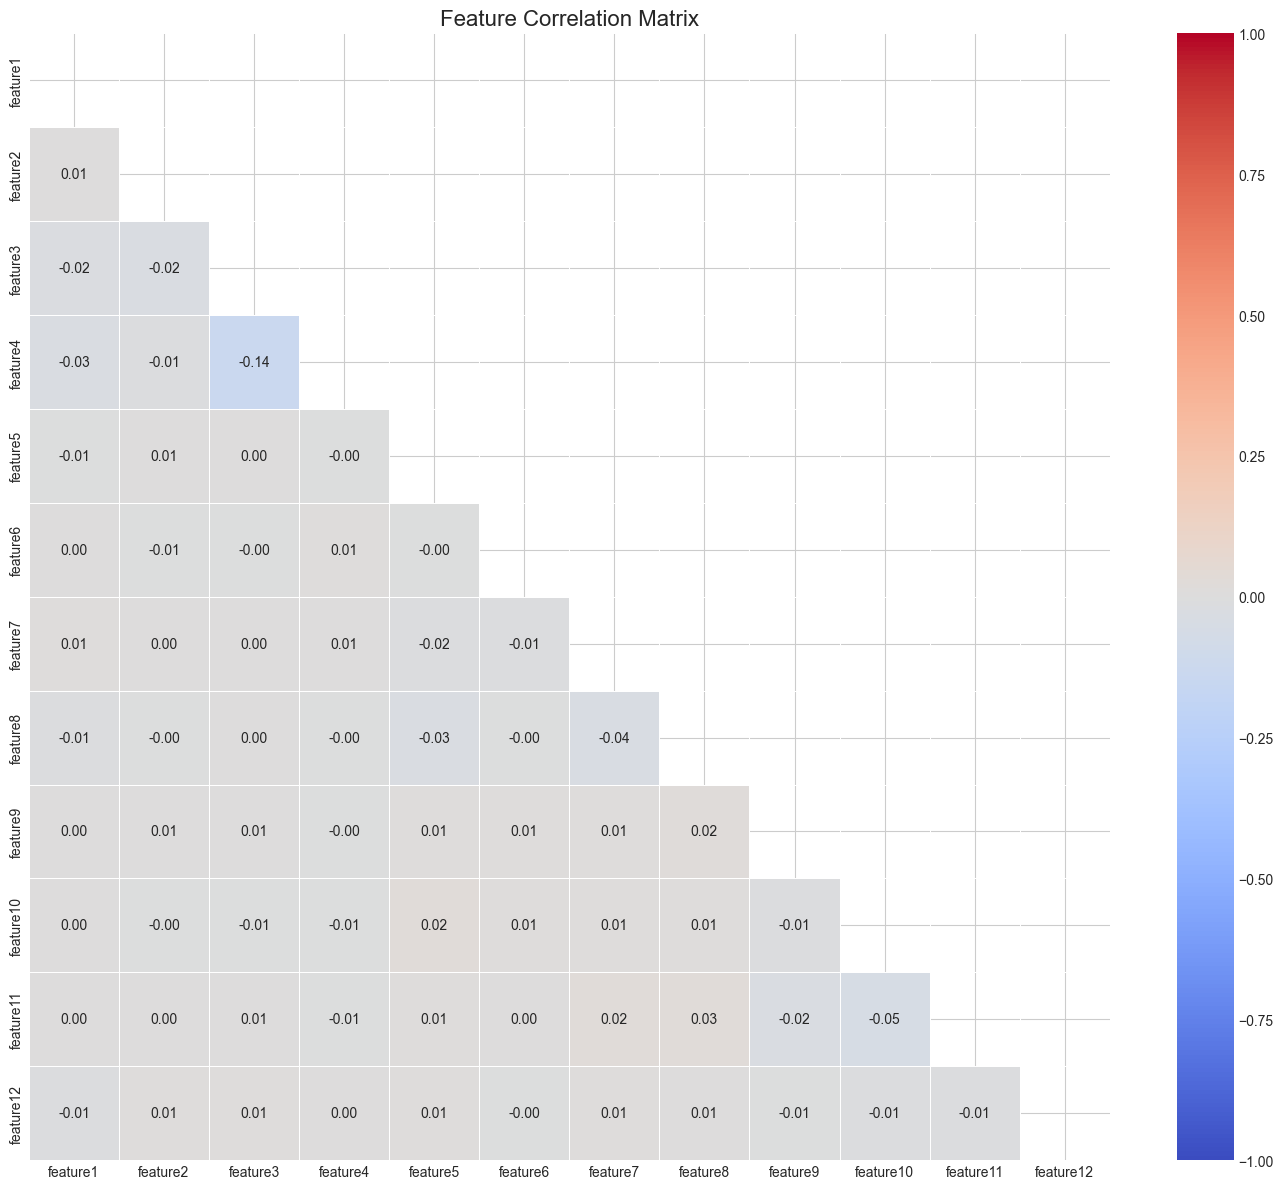

In [6]:
# Select feature columns
feature_cols = [col for col in df.columns if 'feature' in col]

# Correlation heatmap
plt.figure(figsize=(14, 12))
corr_matrix = df[feature_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

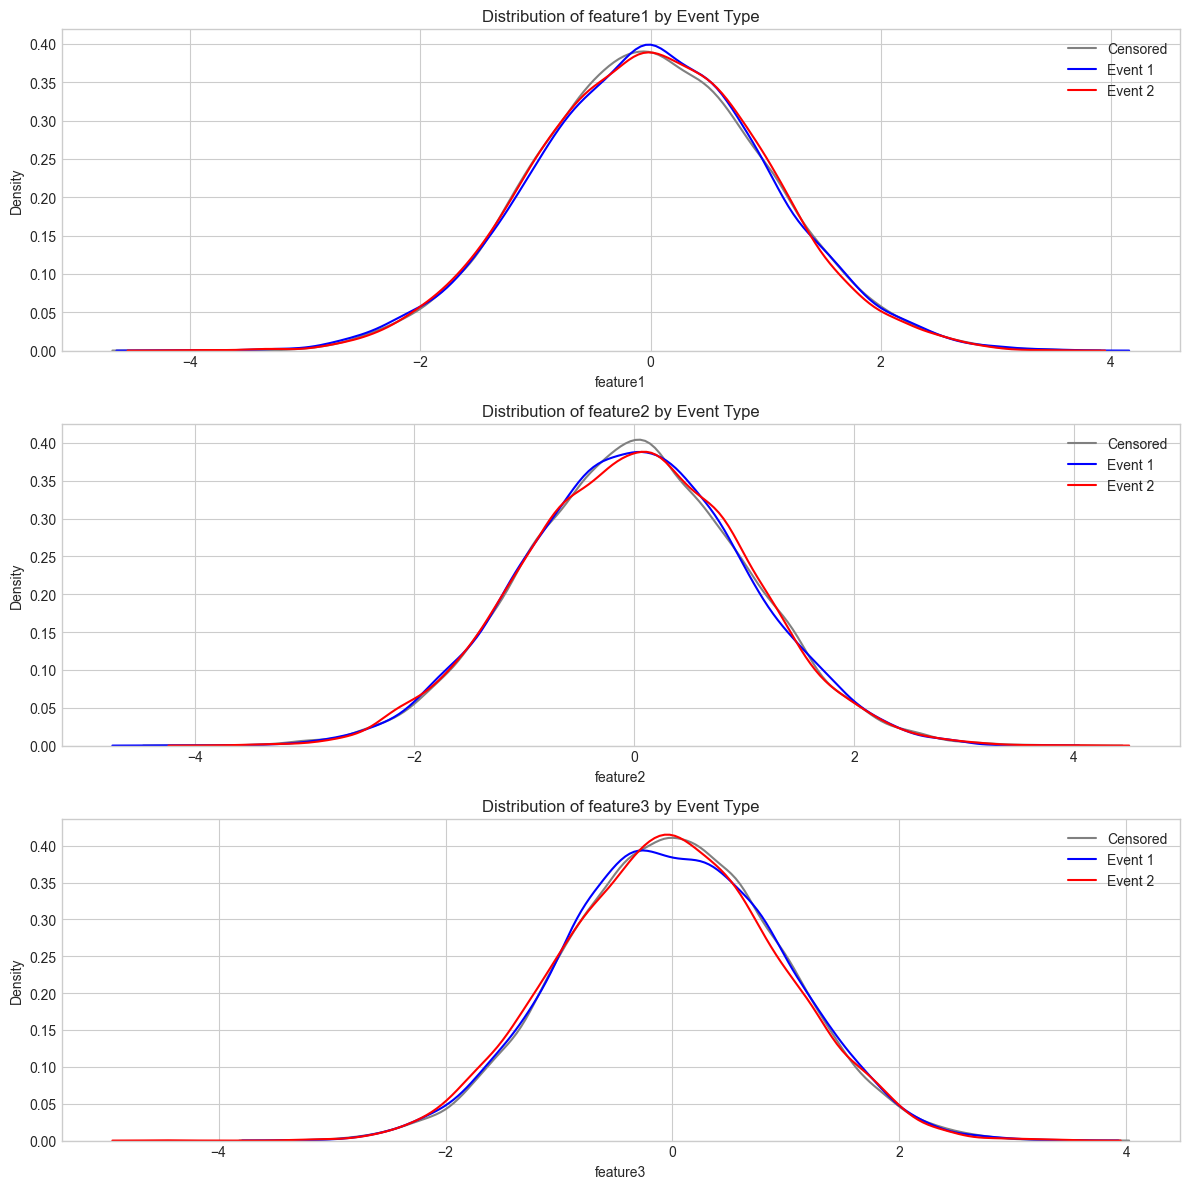

In [11]:
# Create a function to plot feature distributions by event type
def plot_feature_distributions(features, df):
    n_features = len(features)
    fig, axes = plt.subplots(n_features, 1, figsize=(12, 4*n_features))
    
    for i, feature in enumerate(features):
        ax = axes[i] if n_features > 1 else axes
        for event, color, label in zip([0, 1, 2], ['gray', 'blue', 'red'], 
                                      ['Censored', 'Event 1', 'Event 2']):
            subset = df[df['label'] == event]
            sns.kdeplot(subset[feature], ax=ax, color=color, label=label)
        
        ax.set_title(f'Distribution of {feature} by Event Type')
        ax.set_xlabel(feature)
        ax.set_ylabel('Density')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

# Plot distributions for key features
key_features = ['feature1', 'feature2', 'feature3']
plot_feature_distributions(key_features, df)

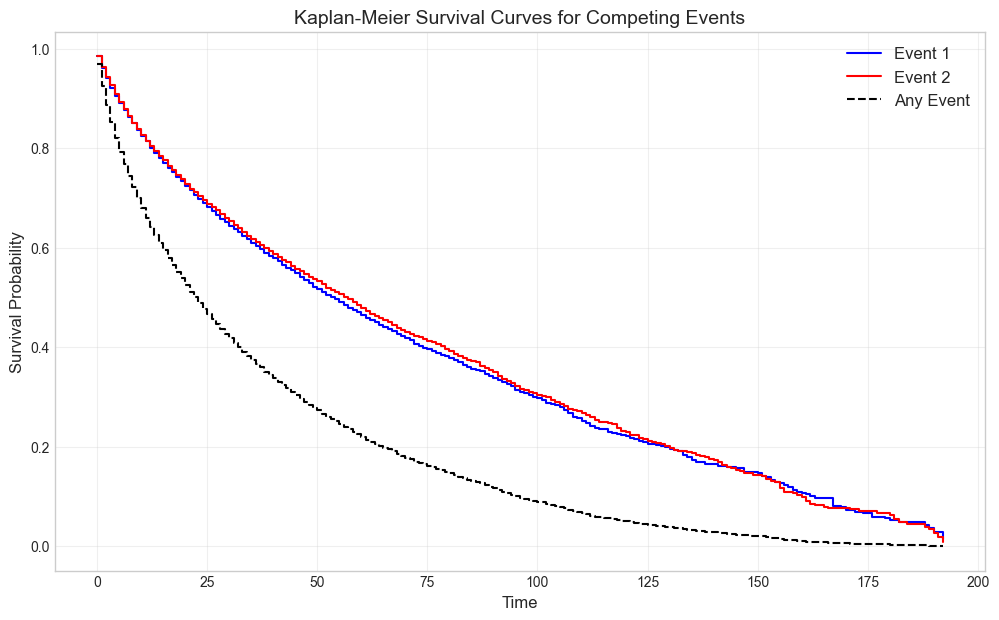

In [ ]:
# Kaplan-Meier curves for each event type
plt.figure(figsize=(12, 7))
kmf = KaplanMeierFitter()

# Event 1 (treating event 2 as censored)
df_event1 = df.copy()
df_event1['event'] = (df_event1['label'] == 1).astype(int)
kmf.fit(df_event1['time'], df_event1['event'], label='Event 1')
ax = kmf.plot_survival_function(ci_show=False, color='blue')

# Event 2 (treating event 1 as censored)
df_event2 = df.copy()
df_event2['event'] = (df_event2['label'] == 2).astype(int)
kmf.fit(df_event2['time'], df_event2['event'], label='Event 2')
kmf.plot_survival_function(ax=ax, ci_show=False, color='red')

# Overall survival (any event)
df_any = df.copy()
df_any['event'] = (df_any['label'] > 0).astype(int)
kmf.fit(df_any['time'], df_any['event'], label='Any Event')
kmf.plot_survival_function(ax=ax, ci_show=False, color='black', ls='--')

plt.title('Kaplan-Meier Survival Curves for Competing Events', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()

Cox PH Model for Event 1 (C-index: 0.5833):


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
feature1,-0.002483,0.997520,0.011345,-0.024718,0.019752,0.975585,1.019948,0.0,-0.218881,8.267428e-01,0.274490
feature2,-0.006616,0.993406,0.011416,-0.028992,0.015760,0.971425,1.015885,0.0,-0.579504,5.622495e-01,0.830718
feature3,-0.001595,0.998406,0.011045,-0.023242,0.020051,0.977026,1.020254,0.0,-0.144451,8.851443e-01,0.176015
feature4,-0.002927,0.997077,0.011019,-0.024523,0.018669,0.975775,1.018844,0.0,-0.265660,7.905009e-01,0.339161
feature5,-0.051114,0.950170,0.011425,-0.073506,-0.028722,0.929131,0.971687,0.0,-4.473970,7.678034e-06,16.990832
feature6,0.000266,1.000266,0.011519,-0.022311,0.022843,0.977936,1.023106,0.0,0.023091,9.815780e-01,0.026825
feature7,-0.032396,0.968123,0.011584,-0.055101,-0.009691,0.946389,0.990356,0.0,-2.796524,5.165551e-03,7.596862
feature8,-0.073845,0.928816,0.011683,-0.096744,-0.050946,0.907789,0.950330,0.0,-6.320541,2.606491e-10,31.837172
feature9,0.064115,1.066214,0.011549,0.041478,0.086751,1.042350,1.090625,0.0,5.551303,2.835481e-08,25.071831



Cox PH Model for Event 2 (C-index: 0.5917):


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
feature1,-0.010146,0.989906,0.011563,-0.032809,0.012518,0.967723,1.012597,0.0,-0.877397,3.802709e-01,1.394900
feature2,0.002986,1.002990,0.011561,-0.019672,0.025645,0.980520,1.025976,0.0,0.258291,7.961820e-01,0.328830
feature3,-0.022758,0.977499,0.011151,-0.044613,-0.000904,0.956367,0.999097,0.0,-2.041019,4.124890e-02,4.599501
feature4,-0.004448,0.995561,0.011144,-0.026290,0.017394,0.974052,1.017546,0.0,-0.399178,6.897623e-01,0.535829
feature5,0.076733,1.079754,0.011551,0.054092,0.099373,1.055582,1.104479,0.0,6.642683,3.080243e-11,34.918165
feature6,0.007388,1.007415,0.011661,-0.015467,0.030242,0.984652,1.030704,0.0,0.633571,5.263611e-01,0.925875
feature7,0.068742,1.071160,0.011758,0.045698,0.091786,1.046758,1.096131,0.0,5.846621,5.016592e-09,27.570645
feature8,0.092977,1.097436,0.011741,0.069964,0.115990,1.072470,1.122984,0.0,7.918682,2.400423e-15,48.565633
feature9,-0.075020,0.927725,0.011656,-0.097864,-0.052175,0.906772,0.949163,0.0,-6.436323,1.224027e-10,32.927646


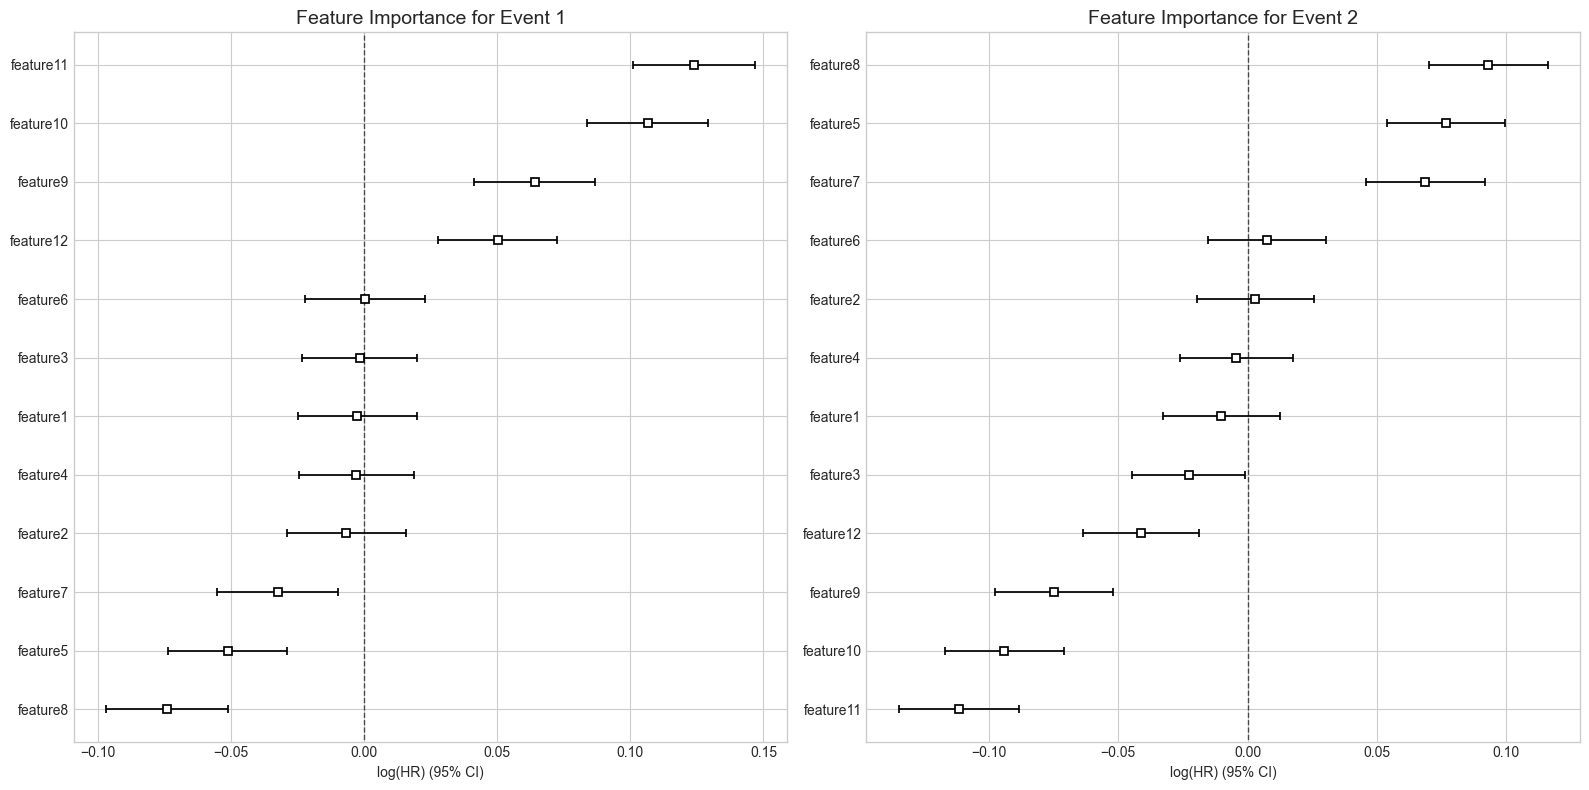

In [13]:
# Prepare data for Cox PH model for each event type
def run_cox_model(event_of_interest):
    df_event = df.copy()
    # For the event of interest, mark other events as censored
    df_event['event'] = (df_event['label'] == event_of_interest).astype(int)
    
    # Fit Cox model
    cph = CoxPHFitter()
    cph.fit(df_event[feature_cols + ['time', 'event']], 
            duration_col='time', 
            event_col='event')
    
    # Calculate concordance index
    c_index = concordance_index(df_event['time'], 
                               -cph.predict_partial_hazard(df_event[feature_cols]), 
                               df_event['event'])
    
    return cph, c_index

# Run Cox models for both event types
cph1, c_index1 = run_cox_model(1)
cph2, c_index2 = run_cox_model(2)

# Display results
print(f"Cox PH Model for Event 1 (C-index: {c_index1:.4f}):")
display(cph1.summary)

print(f"\nCox PH Model for Event 2 (C-index: {c_index2:.4f}):")
display(cph2.summary)

# Plot feature importance for both models
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

cph1.plot(ax=axes[0])
axes[0].set_title('Feature Importance for Event 1', fontsize=14)

cph2.plot(ax=axes[1])
axes[1].set_title('Feature Importance for Event 2', fontsize=14)

plt.tight_layout()
plt.show()

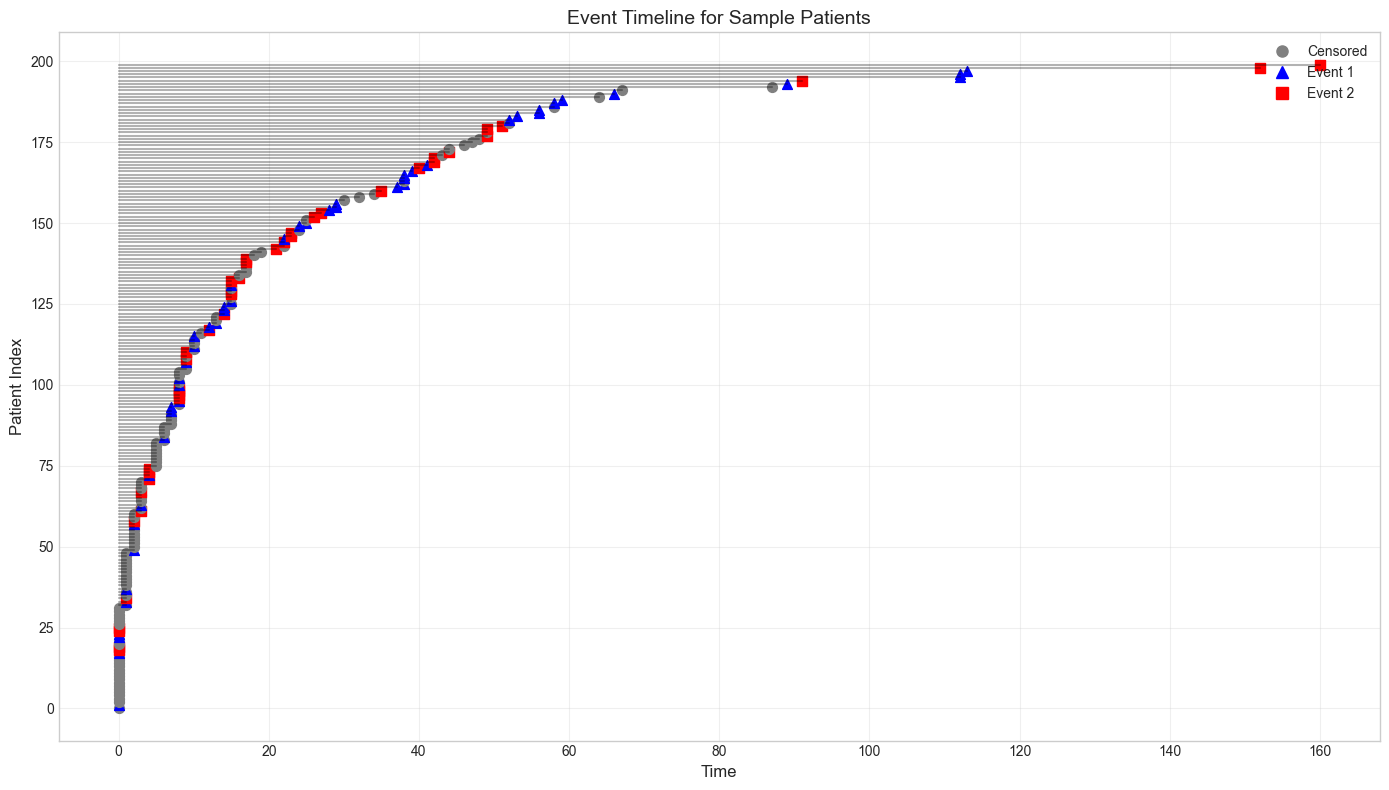

In [23]:
# Create an event timeline visualization
plt.figure(figsize=(14, 8))
# Sample a subset of patients for clearer visualization
sample_size = 200
sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
df_sample = df.loc[sample_indices].sort_values('time')

# Create a color map for event types
colors = {0: 'gray', 1: 'blue', 2: 'red'}
markers = {0: 'o', 1: '^', 2: 's'}
labels = {0: 'Censored', 1: 'Event 1', 2: 'Event 2'}

# Plot each patient's timeline
for i, (idx, row) in enumerate(df_sample.iterrows()):
    plt.plot([0, row['time']], [i, i], 'k-', alpha=0.3)
    plt.scatter(row['time'], i, c=colors[row['label']], 
                marker=markers[row['label']], s=50, 
                label=labels[row['label']] if i == 0 else "")

# Create custom legend handles
handles = [plt.Line2D([0], [0], marker=markers[label], color=colors[label], 
                     linestyle='', markersize=8) for label in [0, 1, 2]]
plt.legend(handles, [labels[0], labels[1], labels[2]], loc='upper right')

plt.xlabel('Time', fontsize=12)
plt.ylabel('Patient Index', fontsize=12)
plt.title('Event Timeline for Sample Patients', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

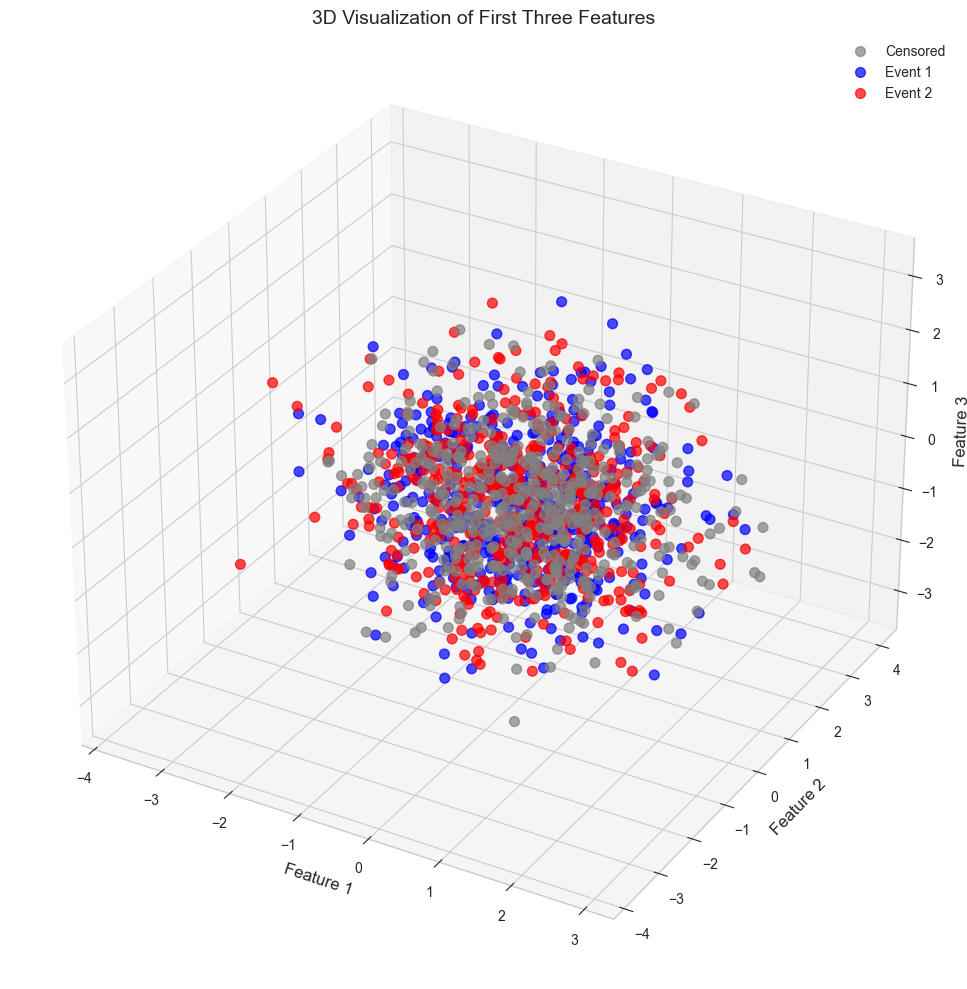

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot to visualize the first three features
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each event type
for event, color, label in zip([0, 1, 2], ['gray', 'blue', 'red'], 
                              ['Censored', 'Event 1', 'Event 2']):
    subset = df[df['label'] == event].sample(min(500, len(df[df['label'] == event])))
    ax.scatter(subset['feature1'], subset['feature2'], subset['feature3'], 
               c=color, label=label, alpha=0.7, s=50)

ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12)
ax.set_zlabel('Feature 3', fontsize=12)
ax.set_title('3D Visualization of First Three Features', fontsize=14)
ax.legend()
plt.tight_layout()
plt.show()

AttributeError: 'Axes' object has no attribute 'is_first_col'

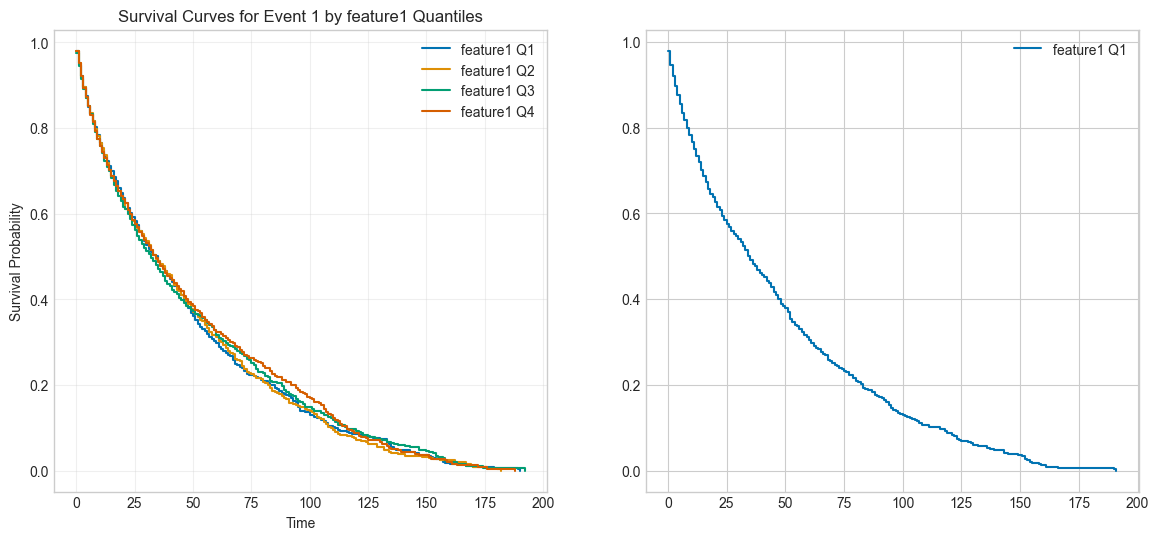

In [25]:
# Analyze time-to-event distributions across feature quantiles
def plot_time_by_feature_quantiles(feature, n_quantiles=4):
    plt.figure(figsize=(14, 6))
    
    # Create quantiles for the feature
    df['quantile'] = pd.qcut(df[feature], n_quantiles, labels=False)
    
    # Plot for each event type
    for event_type, color, title in zip([1, 2], ['blue', 'red'], 
                                      ['Event 1', 'Event 2']):
        plt.subplot(1, 2, event_type)
        
        # Filter for this event type or censored
        event_df = df[(df['label'] == event_type) | (df['label'] == 0)]
        event_df['event'] = (event_df['label'] == event_type).astype(int)
        
        # Plot KM curves for each quantile
        kmf = KaplanMeierFitter()
        for q in range(n_quantiles):
            q_df = event_df[event_df['quantile'] == q]
            if len(q_df) > 0:
                kmf.fit(q_df['time'], q_df['event'], 
                       label=f'{feature} Q{q+1}')
                kmf.plot_survival_function(ci_show=False)
        
        plt.title(f'Survival Curves for {title} by {feature} Quantiles')
        plt.xlabel('Time')
        plt.ylabel('Survival Probability')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Remove the temporary quantile column
    df.drop('quantile', axis=1, inplace=True)

# Plot for key features
for feature in ['feature1', 'feature2', 'feature3']:
    plot_time_by_feature_quantiles(feature)

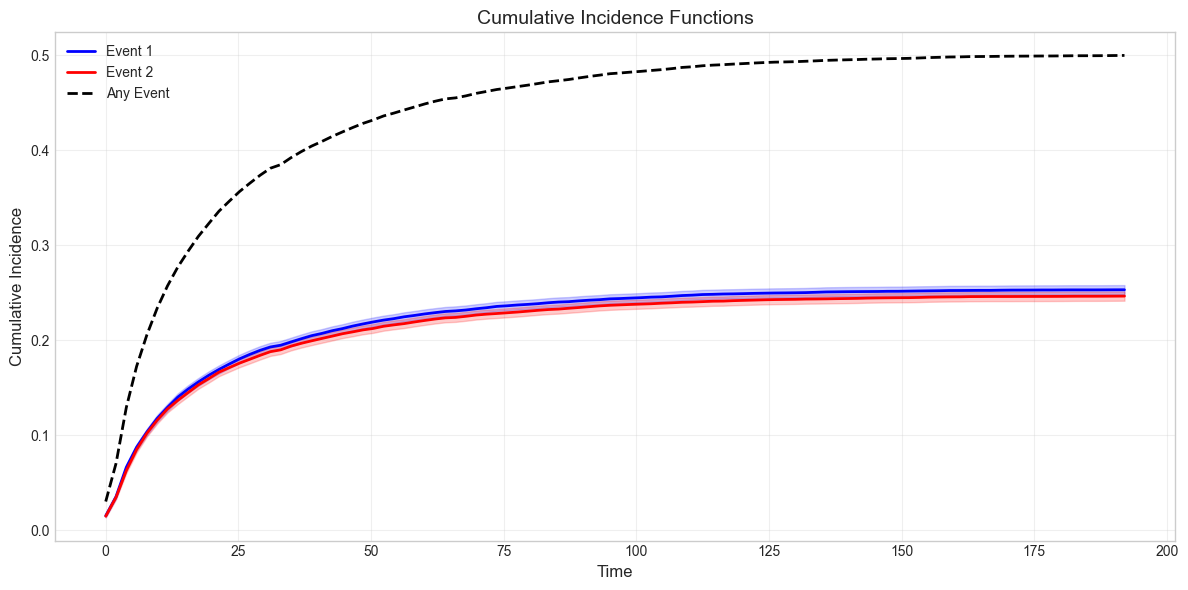

In [ ]:
from matplotlib.colors import to_rgba

# Function to compute and plot cumulative incidence
def plot_cumulative_incidence():
    plt.figure(figsize=(12, 6))
    
    # Time grid for evaluation
    max_time = df['time'].max()
    time_grid = np.linspace(0, max_time, 100)
    
    # Calculate cumulative incidence for each event type
    event_types = [1, 2]
    colors = ['blue', 'red']
    
    for event_type, color in zip(event_types, colors):
        # Initialize cumulative incidence
        ci = np.zeros_like(time_grid)
        
        # For each time point, calculate proportion of subjects with event
        for i, t in enumerate(time_grid):
            # Subjects who had the event by time t
            n_event = sum((df['label'] == event_type) & (df['time'] <= t))
            # Total subjects
            n_total = len(df)
            ci[i] = n_event / n_total
        
        # Plot cumulative incidence
        plt.plot(time_grid, ci, color=color, linewidth=2, 
                label=f'Event {event_type}')
        
        # Add confidence bands (optional)
        ci_lower = np.maximum(0, ci - 1.96 * np.sqrt(ci * (1 - ci) / len(df)))
        ci_upper = np.minimum(1, ci + 1.96 * np.sqrt(ci * (1 - ci) / len(df)))
        plt.fill_between(time_grid, ci_lower, ci_upper, 
                        color=to_rgba(color, 0.2))
    
    # Plot overall cumulative incidence (any event)
    ci_overall = np.zeros_like(time_grid)
    for i, t in enumerate(time_grid):
        n_event = sum((df['label'] > 0) & (df['time'] <= t))
        n_total = len(df)
        ci_overall[i] = n_event / n_total
    
    plt.plot(time_grid, ci_overall, 'k--', linewidth=2, 
            label='Any Event')
    
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Cumulative Incidence', fontsize=12)
    plt.title('Cumulative Incidence Functions', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot cumulative incidence
plot_cumulative_incidence()

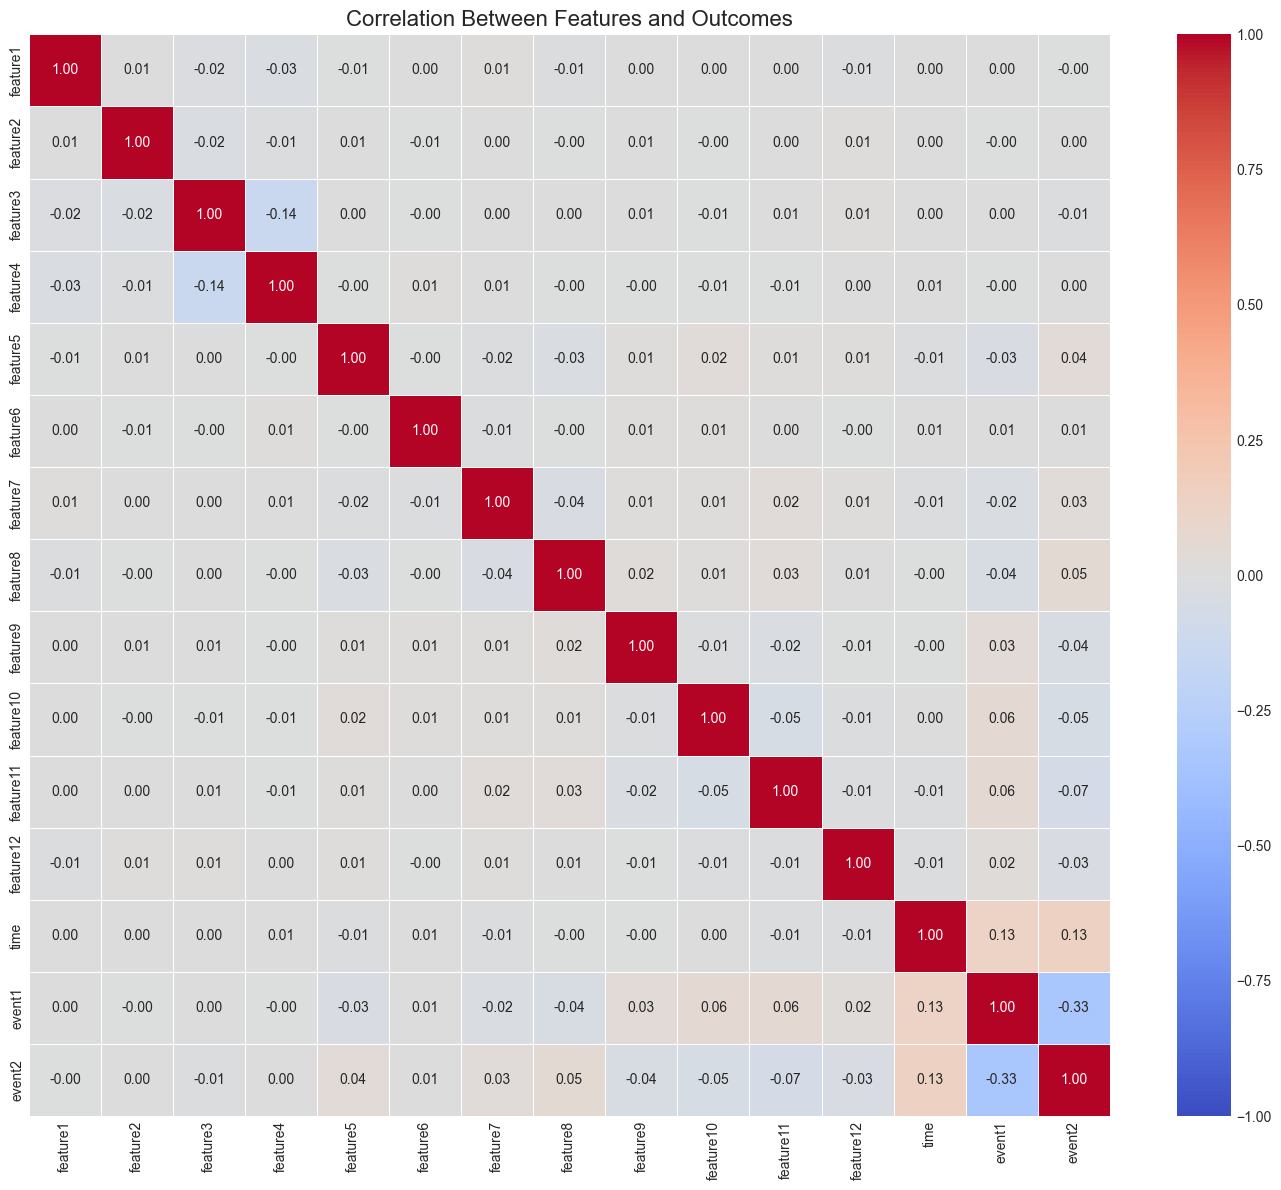

In [ ]:
# Create a more detailed feature correlation analysis
plt.figure(figsize=(14, 12))

# Calculate correlation between features and outcomes
feature_cols = [col for col in df.columns if 'feature' in col]
df_corr = df.copy()

# Create dummy variables for event types
df_corr['event1'] = (df_corr['label'] == 1).astype(int)
df_corr['event2'] = (df_corr['label'] == 2).astype(int)

# Calculate correlation matrix
corr_matrix = df_corr[feature_cols + ['time', 'event1', 'event2']].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
           linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Between Features and Outcomes', fontsize=16)
plt.tight_layout()
plt.show()